## Chapter4.1 単純な識別

必要なライブラリをインポートします

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

scikit-learnでデータセットを作成

In [2]:
from sklearn.datasets import make_blobs

X_dataset, y_dataset = make_blobs(centers=[[0.3, 0.7], [0.7, 0.3]],
                                  cluster_std=0.1,
                                  center_box=(0.0, 1.0),
                                  random_state=42)

Pandas DataFrameの形式に変換し、カラム名に `x0`, `x1`, `y`を付けます

In [3]:
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

In [4]:
dataset.head()

,x0,x1,y
0,0.747324,0.292717,1
1,0.216078,0.669079,0
2,0.508123,0.297349,1
3,0.252083,0.681434,0
4,0.602532,0.378708,1


データセットをプロットします

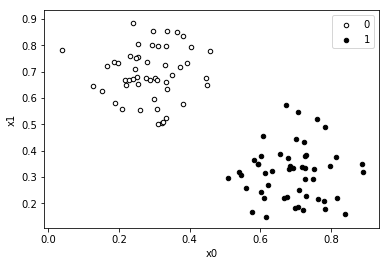

In [5]:
def plot_dataset(dataset):
    fig, ax = plt.subplots()
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color,
               edgecolor='black', linewidth='1')


plot_dataset(dataset)

補助線を引いて識別境界を作ります

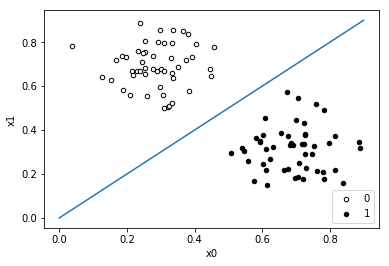

In [6]:
def plot_boundary(m, n):
    x = np.arange(0.0, 1.0, 0.1)
    y = eval('%f*x' % (-m / (n + 1e-6)))
    plt.plot(x, y)


plot_dataset(dataset)
plot_boundary(-1, 1)

識別境界の直線を基に、データを識別します

In [7]:
def predict(x0, x1):
    # 三項演算子、lambda等でよりシンプルに書くこともできる
    if x0 < x1:
        y = 0
    else:  # x0 >= x1
        y = 1
    return y


pred = dataset.apply(lambda X: predict(X.x0, X.x1), axis=1)
label = dataset.y
print(pred.values)
print(label.values)
print("Accuracy:%f" % ((pred == label).count() / float(label.count())))

[1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Accuracy:1.000000


別のデータセットを作成します

In [8]:
X_dataset, y_dataset = make_blobs(centers=[[0.6, 0.7], [0.4, 0.3]],
                                  cluster_std=0.1,
                                  center_box=(0.0, 1.0),
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

dataset.head()

,x0,x1,y
0,0.447324,0.292717,1
1,0.516078,0.669079,0
2,0.208123,0.297349,1
3,0.552083,0.681434,0
4,0.302532,0.378708,1


In [9]:
def predict(x0, x1):

    if x1 > -0.8 * x0 + 0.92:
        y = 0
    else:  # x1 <= -0.8*x0+0.92
        y = 1
    return y


pred = dataset.apply(lambda X: predict(X.x0, X.x1), axis=1)
label = dataset.y
cor = (pred == label)
print(pred.values)
print(label.values)
print("Accuracy:%f" % (cor[cor == True].count() / float(label.count())))

[1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Accuracy:1.000000


In [10]:
cor[cor == True].count()

100